In [90]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder

In [91]:
df = pd.read_csv('/Users/ishikadang/Desktop/Untitled Folder 1/dataset.csv')

In [92]:
df

,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.333333,0.749498,0.777778,0.7,0.8,0.769231,0.931689,0.662042,0.752463,1
1,0.133333,0.490638,0.777778,0.3,0.4,0.153846,0.352093,0.132231,0.316905,0
2,0.000000,0.460256,0.444444,0.3,0.3,0.051282,0.052347,0.089765,0.254859,0
3,0.000000,0.507347,0.555556,0.4,0.5,0.384615,0.309913,0.289758,0.440784,0
4,0.400000,0.662020,0.666667,0.7,0.5,0.461538,0.497929,0.397544,0.392760,1
...,...,...,...,...,...,...,...,...,...,...
295,0.000000,0.576078,0.555556,0.6,0.6,0.230769,0.421105,0.354628,0.096438,0
296,0.000000,0.587738,0.555556,0.5,0.5,0.230769,0.426939,0.201772,0.430858,1
297,0.400000,0.740044,0.666667,0.5,0.7,0.615385,0.681916,0.562821,0.681403,1
298,0.333333,0.654656,0.666667,0.5,0.7,0.589744,0.585173,0.549063,0.663228,1


In [93]:
column_name = 'years_of_experience'

# Use NumPy to replace values in the specified column
# Randomly generate values greater than 4 to replace existing values
df[column_name] = np.random.randint(4, 10, size=len(df))


print(df)

     years_of_experience  functional_competency_score  top1_skills_score  \
0                      8                     0.749498           0.777778   
1                      7                     0.490638           0.777778   
2                      8                     0.460256           0.444444   
3                      7                     0.507347           0.555556   
4                      4                     0.662020           0.666667   
..                   ...                          ...                ...   
295                    5                     0.576078           0.555556   
296                    6                     0.587738           0.555556   
297                    6                     0.740044           0.666667   
298                    8                     0.654656           0.666667   
299                    4                     0.754280           0.222222   

     top2_skills_score  top3_skills_score  behavior_competency_score  \
0              

In [94]:
df

,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,8,0.749498,0.777778,0.7,0.8,0.769231,0.931689,0.662042,0.752463,1
1,7,0.490638,0.777778,0.3,0.4,0.153846,0.352093,0.132231,0.316905,0
2,8,0.460256,0.444444,0.3,0.3,0.051282,0.052347,0.089765,0.254859,0
3,7,0.507347,0.555556,0.4,0.5,0.384615,0.309913,0.289758,0.440784,0
4,4,0.662020,0.666667,0.7,0.5,0.461538,0.497929,0.397544,0.392760,1
...,...,...,...,...,...,...,...,...,...,...
295,5,0.576078,0.555556,0.6,0.6,0.230769,0.421105,0.354628,0.096438,0
296,6,0.587738,0.555556,0.5,0.5,0.230769,0.426939,0.201772,0.430858,1
297,6,0.740044,0.666667,0.5,0.7,0.615385,0.681916,0.562821,0.681403,1
298,8,0.654656,0.666667,0.5,0.7,0.589744,0.585173,0.549063,0.663228,1


Now we have the column of years_of_experience of min of 4 and more


In [95]:
df.describe()

,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,6.526667,0.578350,0.681111,0.510667,0.521667,0.457692,0.480880,0.434732,0.426792,0.530000
std,1.644680,0.156784,0.238006,0.229482,0.230523,0.260942,0.244018,0.225863,0.248246,0.499933
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,0.480041,0.527778,0.300000,0.300000,0.230769,0.297052,0.249501,0.224828,0.000000
50%,6.500000,0.576121,0.666667,0.500000,0.500000,0.358974,0.433097,0.401338,0.389711,1.000000
75%,8.000000,0.685611,0.888889,0.700000,0.700000,0.666667,0.687145,0.612519,0.632039,1.000000
max,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   years_of_experience          300 non-null    int64  
 1   functional_competency_score  300 non-null    float64
 2   top1_skills_score            300 non-null    float64
 3   top2_skills_score            300 non-null    float64
 4   top3_skills_score            300 non-null    float64
 5   behavior_competency_score    300 non-null    float64
 6   top1_behavior_skill_score    300 non-null    float64
 7   top2_behavior_skill_score    300 non-null    float64
 8   top3_behavior_skill_score    300 non-null    float64
 9   call_for_interview           300 non-null    int64  
dtypes: float64(8), int64(2)
memory usage: 23.6 KB


In [97]:
df.isnull().sum()

years_of_experience            0
functional_competency_score    0
top1_skills_score              0
top2_skills_score              0
top3_skills_score              0
behavior_competency_score      0
top1_behavior_skill_score      0
top2_behavior_skill_score      0
top3_behavior_skill_score      0
call_for_interview             0
dtype: int64

In [126]:
print(df.corr()['call_for_interview'].abs().sort_values(ascending = False))

call_for_interview             1.000000
behavior_competency_score      0.729579
top3_behavior_skill_score      0.728638
top1_behavior_skill_score      0.698488
top2_behavior_skill_score      0.670361
top1_skills_score              0.663129
top2_skills_score              0.606479
top3_skills_score              0.573296
functional_competency_score    0.522524
years_of_experience            0.064024
Name: call_for_interview, dtype: float64


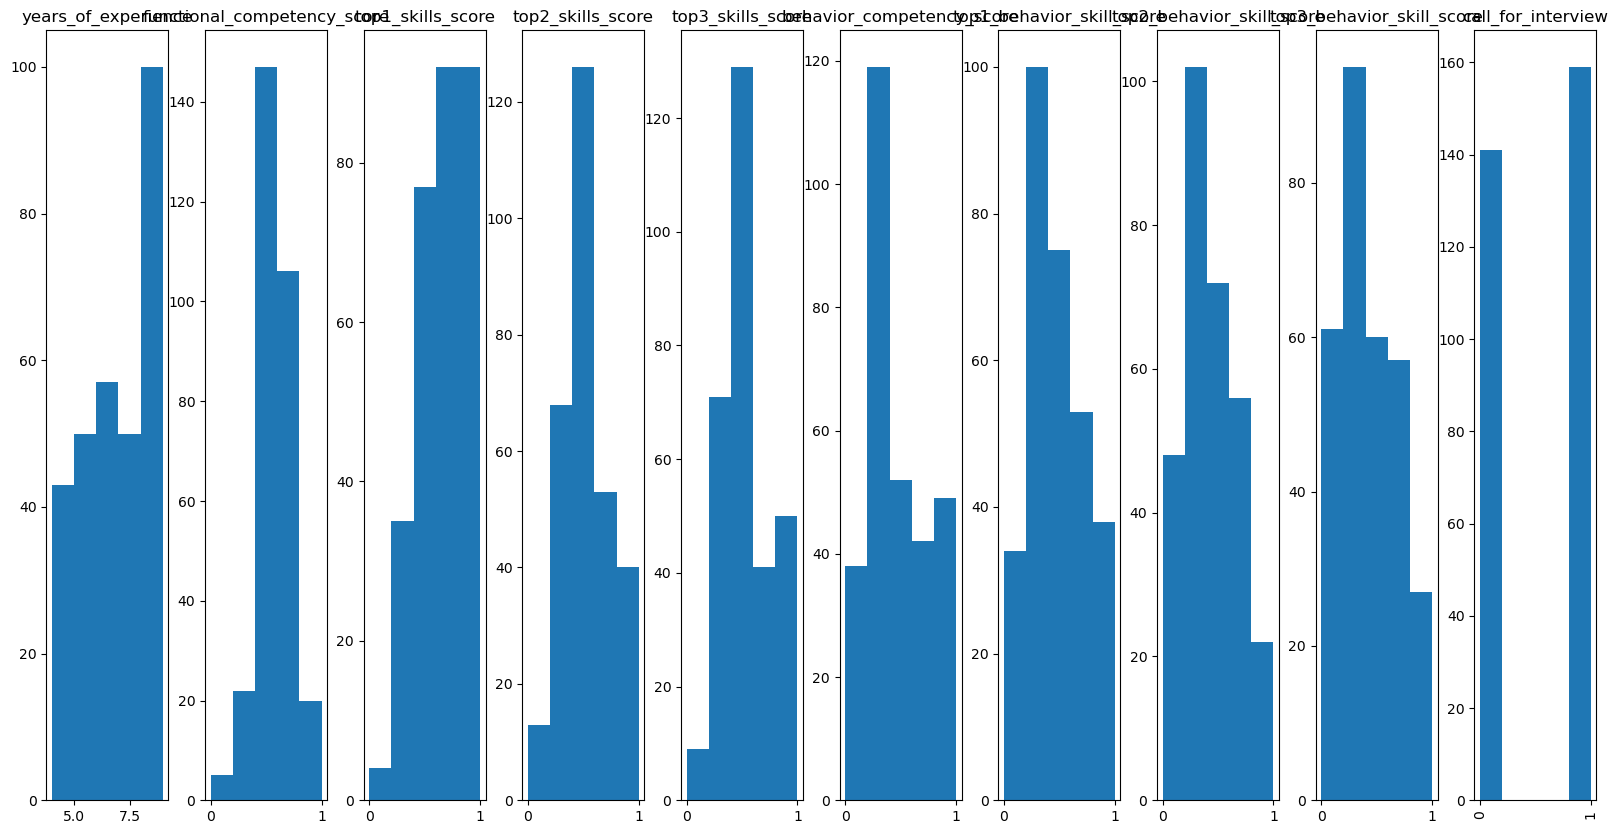

In [141]:
fig,axis = plt.subplots(1,10,figsize =(20,10))
df.hist(ax=axis, bins =5, grid=False)
plt.xticks(rotation=90)
plt.show()

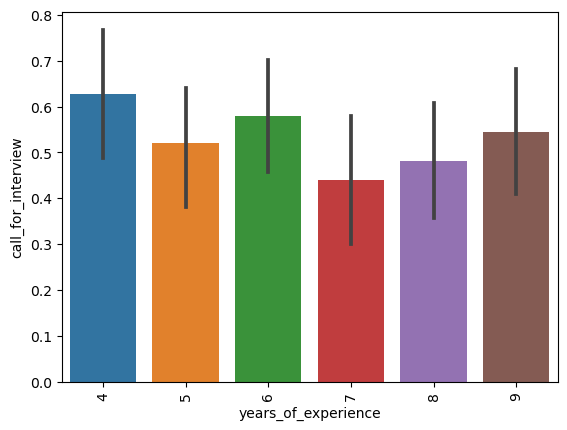

In [171]:
sns.barplot(
    data=df,
    x="years_of_experience", y="call_for_interview",
)
plt.xticks(rotation=90)
plt.show()

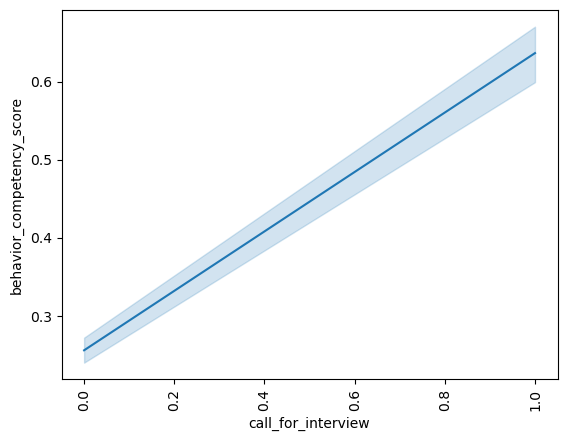

In [182]:
sns.lineplot(data = df, y= "behavior_competency_score",x = "call_for_interview")

plt.xticks(rotation=90)
plt.show()

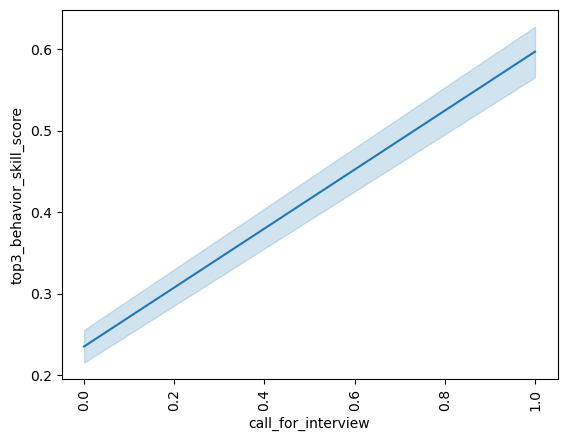

In [186]:
sns.lineplot(data = df, y = "top3_behavior_skill_score",x = "call_for_interview")

plt.xticks(rotation=90)
plt.show()

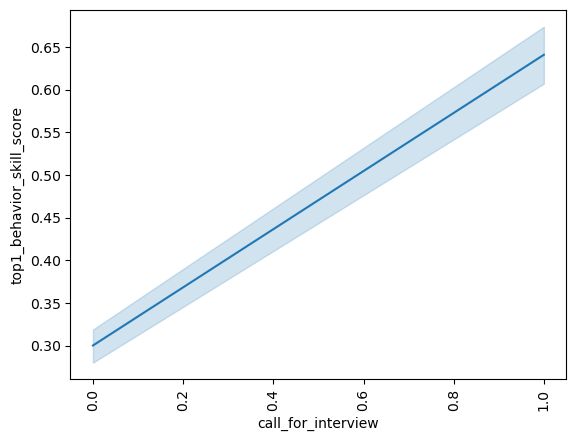

In [195]:
sns.lineplot(data = df, y = "top1_behavior_skill_score",x = "call_for_interview")

plt.xticks(rotation=90)
plt.show()

As, we can see that the above features are highly correlated to our target variable " call_for_interview" and it follows below

<Figure size 1000x1500 with 0 Axes>

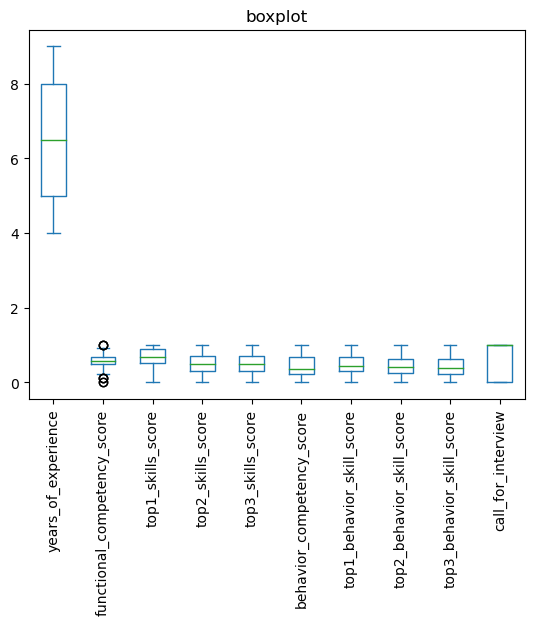

In [206]:
plt.figure(figsize=(10,15))
ax = df.plot(kind='box', title='boxplot')
plt.xticks(rotation=90)
plt.show()

<Axes: >

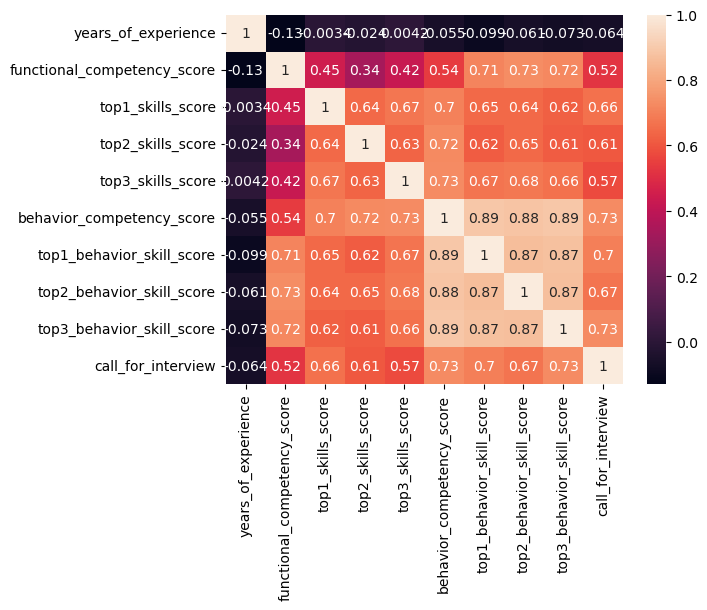

In [133]:
sns.heatmap(df.corr(), annot=True)

# another dataset

In [120]:
df1 = pd.read_csv('/Users/ishikadang/Desktop/Untitled Folder 1/UpdatedResumeDataSet.csv')

In [136]:
df1

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


The top four job categories we have in the data are 

Java developer, Testing, and DevOps Engineer, Python Developer

In [239]:
#slicing the dataset to get first 300 values only
data= df1[:300]

In [138]:
data

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
295,Civil Engineer,Education Details \r\n B.E in Civil Engineerin...
296,Civil Engineer,Education Details \r\nJanuary 2005 S.S.C Bara...
297,Civil Engineer,SKILLS â¢ 1.Autocad â¢ 2.Pro v â¢ 3.Catia â...
298,Civil Engineer,Computer Skills â¢ Holder of valid KSA licens...


In [159]:
import plotly.express as px
import plotly.graph_objects as go


fig = px.histogram(data, x="Category", title="Distribution of Jobs Categories")
fig.update_xaxes(categoryorder="total descending")
fig.show()

In [161]:
series = data['Category'].value_counts()

data_result = pd.DataFrame(series)

data_result = data_result.reset_index()  

data_result.columns = ['Category', 'Total']

print(data_result)


              Category  Total
0        Web Designing     45
1                   HR     44
2         Data Science     40
3  Mechanical Engineer     40
4                Sales     40
5                 Arts     36
6   Health and fitness     30
7             Advocate     20
8       Civil Engineer      5


In [163]:
fig = px.pie(data_result,
                 values='Total',
                 names='Category')

fig.show()

# Combining the two datasets

In [426]:
data1 = pd.DataFrame(df)
data2 = pd.DataFrame(data)

In [427]:
combined_data = pd.concat([data1,data2], axis =1 )

In [428]:
combined_data

,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview,Category,Resume
0,8,0.749498,0.777778,0.7,0.8,0.769231,0.931689,0.662042,0.752463,1,Data Science,Skills * Programming Languages: Python (pandas...
1,7,0.490638,0.777778,0.3,0.4,0.153846,0.352093,0.132231,0.316905,0,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,8,0.460256,0.444444,0.3,0.3,0.051282,0.052347,0.089765,0.254859,0,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,7,0.507347,0.555556,0.4,0.5,0.384615,0.309913,0.289758,0.440784,0,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,4,0.662020,0.666667,0.7,0.5,0.461538,0.497929,0.397544,0.392760,1,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...,...,...,...,...,...,...,...,...,...,...
295,5,0.576078,0.555556,0.6,0.6,0.230769,0.421105,0.354628,0.096438,0,Civil Engineer,Education Details \r\n B.E in Civil Engineerin...
296,6,0.587738,0.555556,0.5,0.5,0.230769,0.426939,0.201772,0.430858,1,Civil Engineer,Education Details \r\nJanuary 2005 S.S.C Bara...
297,6,0.740044,0.666667,0.5,0.7,0.615385,0.681916,0.562821,0.681403,1,Civil Engineer,SKILLS â¢ 1.Autocad â¢ 2.Pro v â¢ 3.Catia â...
298,8,0.654656,0.666667,0.5,0.7,0.589744,0.585173,0.549063,0.663228,1,Civil Engineer,Computer Skills â¢ Holder of valid KSA licens...


In [429]:
combined_data.isnull().sum()

years_of_experience            0
functional_competency_score    0
top1_skills_score              0
top2_skills_score              0
top3_skills_score              0
behavior_competency_score      0
top1_behavior_skill_score      0
top2_behavior_skill_score      0
top3_behavior_skill_score      0
call_for_interview             0
Category                       0
Resume                         0
dtype: int64

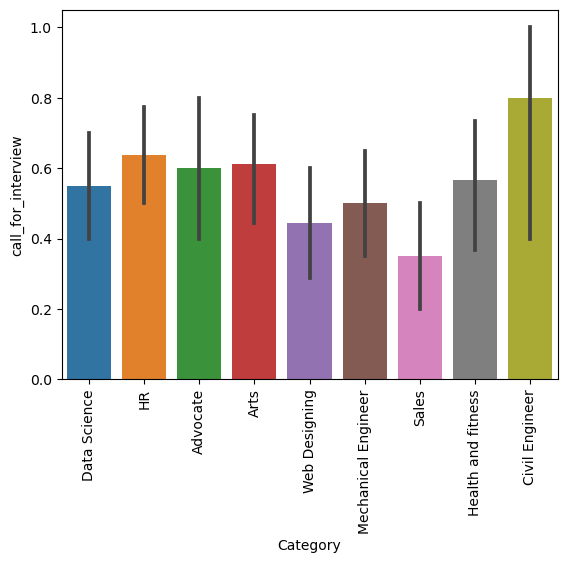

In [430]:
sns.barplot(
    data=combined_data,
    x="Category", y="call_for_interview",
)
plt.xticks(rotation=90)
plt.show()

In [431]:
combined_data['Resume'].nunique()

61

In [432]:
combined_data['Resume'].value_counts()

Technical Skills Web Technologies: Angular JS, HTML5, CSS3, SASS, Bootstrap, Jquery, Javascript. Software: Brackets, Visual Studio, Photoshop, Visual Studio Code Education Details \r\nJanuary 2015 B.E CSE Nagpur, Maharashtra G.H.Raisoni College of Engineering\r\nOctober 2009  Photography Competition Click Nagpur, Maharashtra Maharashtra State Board\r\n    College Magazine OCEAN\r\nWeb Designer \r\n\r\nWeb Designer - Trust Systems and Software\r\nSkill Details \r\nPHOTOSHOP- Exprience - 28 months\r\nBOOTSTRAP- Exprience - 6 months\r\nHTML5- Exprience - 6 months\r\nJAVASCRIPT- Exprience - 6 months\r\nCSS3- Exprience - Less than 1 year months\r\nAngular 4- Exprience - Less than 1 year monthsCompany Details \r\ncompany - Trust Systems and Software\r\ndescription - Projects worked on:\r\n1. TrustBank-CBS\r\nProject Description: TrustBank-CBS is a core banking solution by Trust Systems.\r\nRoles and Responsibility:\r\nâ Renovated complete UI to make it more modern, user-friendly, maintaina

In [433]:
combined_data

,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview,Category,Resume
0,8,0.749498,0.777778,0.7,0.8,0.769231,0.931689,0.662042,0.752463,1,Data Science,Skills * Programming Languages: Python (pandas...
1,7,0.490638,0.777778,0.3,0.4,0.153846,0.352093,0.132231,0.316905,0,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,8,0.460256,0.444444,0.3,0.3,0.051282,0.052347,0.089765,0.254859,0,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,7,0.507347,0.555556,0.4,0.5,0.384615,0.309913,0.289758,0.440784,0,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,4,0.662020,0.666667,0.7,0.5,0.461538,0.497929,0.397544,0.392760,1,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...,...,...,...,...,...,...,...,...,...,...
295,5,0.576078,0.555556,0.6,0.6,0.230769,0.421105,0.354628,0.096438,0,Civil Engineer,Education Details \r\n B.E in Civil Engineerin...
296,6,0.587738,0.555556,0.5,0.5,0.230769,0.426939,0.201772,0.430858,1,Civil Engineer,Education Details \r\nJanuary 2005 S.S.C Bara...
297,6,0.740044,0.666667,0.5,0.7,0.615385,0.681916,0.562821,0.681403,1,Civil Engineer,SKILLS â¢ 1.Autocad â¢ 2.Pro v â¢ 3.Catia â...
298,8,0.654656,0.666667,0.5,0.7,0.589744,0.585173,0.549063,0.663228,1,Civil Engineer,Computer Skills â¢ Holder of valid KSA licens...


In [435]:
combined_data

,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview,Category,Resume
0,8,0.749498,0.777778,0.7,0.8,0.769231,0.931689,0.662042,0.752463,1,3,Skills * Programming Languages: Python (pandas...
1,7,0.490638,0.777778,0.3,0.4,0.153846,0.352093,0.132231,0.316905,0,3,Education Details \r\nMay 2013 to May 2017 B.E...
2,8,0.460256,0.444444,0.3,0.3,0.051282,0.052347,0.089765,0.254859,0,3,"Areas of Interest Deep Learning, Control Syste..."
3,7,0.507347,0.555556,0.4,0.5,0.384615,0.309913,0.289758,0.440784,0,3,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,4,0.662020,0.666667,0.7,0.5,0.461538,0.497929,0.397544,0.392760,1,3,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...,...,...,...,...,...,...,...,...,...,...
295,5,0.576078,0.555556,0.6,0.6,0.230769,0.421105,0.354628,0.096438,0,2,Education Details \r\n B.E in Civil Engineerin...
296,6,0.587738,0.555556,0.5,0.5,0.230769,0.426939,0.201772,0.430858,1,2,Education Details \r\nJanuary 2005 S.S.C Bara...
297,6,0.740044,0.666667,0.5,0.7,0.615385,0.681916,0.562821,0.681403,1,2,SKILLS â¢ 1.Autocad â¢ 2.Pro v â¢ 3.Catia â...
298,8,0.654656,0.666667,0.5,0.7,0.589744,0.585173,0.549063,0.663228,1,2,Computer Skills â¢ Holder of valid KSA licens...


Removing any unnecessary information from resumes like URLs, hashtags, and special characters. Creating the 'Clea Resume’ column

In [441]:
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText) # removing urls
    resumeText = re.sub('RT|cc', ' ', resumeText)  #removing RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # removing hastags
    resumeText = re.sub('@\S+', '  ', resumeText)   # removing mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)
    resumeText = re.sub('\s+', ' ', resumeText)
    return resumeText

combined_data['cleaned_resume'] = combined_data.Resume.apply(lambda x : cleanResume(x))
    

In [451]:
combined_data

,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview,Category,Resume,cleaned_resume
0,8,0.749498,0.777778,0.7,0.8,0.769231,0.931689,0.662042,0.752463,1,3,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,7,0.490638,0.777778,0.3,0.4,0.153846,0.352093,0.132231,0.316905,0,3,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,8,0.460256,0.444444,0.3,0.3,0.051282,0.052347,0.089765,0.254859,0,3,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,7,0.507347,0.555556,0.4,0.5,0.384615,0.309913,0.289758,0.440784,0,3,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,4,0.662020,0.666667,0.7,0.5,0.461538,0.497929,0.397544,0.392760,1,3,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,5,0.576078,0.555556,0.6,0.6,0.230769,0.421105,0.354628,0.096438,0,2,Education Details \r\n B.E in Civil Engineerin...,Education Details B E in Civil Engineering Civ...
296,6,0.587738,0.555556,0.5,0.5,0.230769,0.426939,0.201772,0.430858,1,2,Education Details \r\nJanuary 2005 S.S.C Bara...,Education Details January 2005 S S C Baramati ...
297,6,0.740044,0.666667,0.5,0.7,0.615385,0.681916,0.562821,0.681403,1,2,SKILLS â¢ 1.Autocad â¢ 2.Pro v â¢ 3.Catia â...,SKILLS 1 Autocad 2 Pro v 3 Catia 4 word excel ...
298,8,0.654656,0.666667,0.5,0.7,0.589744,0.585173,0.549063,0.663228,1,2,Computer Skills â¢ Holder of valid KSA licens...,Computer Skills Holder of valid KSA license Ba...


In [448]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


# Checking the most common words from resume

In [452]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import string


In [457]:
combine_resumes = ''.join(combined_data["Resume"].values)

#Tokenizing the combined text
words = word_tokenize(combine_resumes)

#Removing stopwords & punctuation
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.lower() not in stop_words and word not in string.punctuation]

#calculating the frequency distribution
freq_dist = FreqDist(filtered_words)

#most common word
most_common = freq_dist.most_common(50)


print(most_common)

[('â\x80¢', 1973), ('Details', 909), ('Exprience', 819), ('company', 801), ('description', 732), ('months', 665), ('1', 501), ('6', 361), ('January', 342), ('year', 326), ('â\x97\x8f', 324), ('Maharashtra', 315), ('sales', 305), ('Skill', 300), ('Ã±', 300), ('project', 284), ('â\x9e¢', 281), ('Less', 264), ('Project', 249), ('College', 238), ('team', 237), ("'s", 236), ('time', 232), ('data', 225), ('Engineering', 216), ('Pune', 216), ('Data', 212), ('application', 203), ('monthsCompany', 202), ('Web', 196), ('Science', 190), ('Sales', 188), ('University', 181), ('work', 174), ('Responsibilities', 171), ('Nagpur', 166), ('like', 164), ('Mumbai', 163), ('2', 162), ('Used', 157), ('Ltd', 157), ('Software', 156), ('Management', 156), ('India', 150), ('SQL', 144), ('Fitness', 144), ('Pvt', 142), ('Team', 141), ('Technologies', 140), ('developed', 138)]


In [467]:
combined_data.drop(['Resume'], axis = 1)

,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview,Category,cleaned_resume
0,8,0.749498,0.777778,0.7,0.8,0.769231,0.931689,0.662042,0.752463,1,3,Skills Programming Languages Python pandas num...
1,7,0.490638,0.777778,0.3,0.4,0.153846,0.352093,0.132231,0.316905,0,3,Education Details May 2013 to May 2017 B E UIT...
2,8,0.460256,0.444444,0.3,0.3,0.051282,0.052347,0.089765,0.254859,0,3,Areas of Interest Deep Learning Control System...
3,7,0.507347,0.555556,0.4,0.5,0.384615,0.309913,0.289758,0.440784,0,3,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,4,0.662020,0.666667,0.7,0.5,0.461538,0.497929,0.397544,0.392760,1,3,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...,...,...,...,...,...,...,...,...,...,...
295,5,0.576078,0.555556,0.6,0.6,0.230769,0.421105,0.354628,0.096438,0,2,Education Details B E in Civil Engineering Civ...
296,6,0.587738,0.555556,0.5,0.5,0.230769,0.426939,0.201772,0.430858,1,2,Education Details January 2005 S S C Baramati ...
297,6,0.740044,0.666667,0.5,0.7,0.615385,0.681916,0.562821,0.681403,1,2,SKILLS 1 Autocad 2 Pro v 3 Catia 4 word excel ...
298,8,0.654656,0.666667,0.5,0.7,0.589744,0.585173,0.549063,0.663228,1,2,Computer Skills Holder of valid KSA license Ba...


In [468]:
from sklearn.preprocessing import LabelEncoder

# Create a list of categorical columns to be label encoded
categorical_columns = ['Category']

le = LabelEncoder()

for column in categorical_columns:
    if column in combined_data:
        combined_data[column] = le.fit_transform(combined_data[column])


# Splitting the dataset into X and y

In [469]:
X = combined_data.drop('call_for_interview', axis=1)
y = combined_data['call_for_interview']


In [470]:
#Get feature name
features = X.columns

In [473]:
features

Index(['years_of_experience', 'functional_competency_score',
       'top1_skills_score', 'top2_skills_score', 'top3_skills_score',
       'behavior_competency_score', 'top1_behavior_skill_score',
       'top2_behavior_skill_score', 'top3_behavior_skill_score', 'Category',
       'Resume', 'cleaned_resume'],
      dtype='object')

# Identfying all the categorical variables¶

In [472]:
#Identfying categorical columns(object type) 
categorical_columns = [columns for columns , dtype in X.dtypes.items() if dtype == 'object']


#'Categorical columns'now contains the name of categorical variables
print(categorical_columns)

['cleaned_resume']


# Encode Categories

In [474]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
combined_data['cleaned_resume'] = label_encoder.fit_transform(combined_data['cleaned_resume'])

# Standardize¶

In [475]:
# Standardizing the data
scaler = StandardScaler()
X_enc_scaled = scaler.fit_transform(X_enc)

# Logistic regression model

In [476]:
#Creating a logistic regression model
lr = LogisticRegression(max_iter = 1000)

In [477]:
lr.fit(X_enc_scaled,y)

LogisticRegression(max_iter=1000)

# Model Accuracy¶

In [479]:
print(lr.score(X_enc_scaled,y))

0.91


In [480]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_enc_scaled, y, test_size=0.2, random_state=42)

# Fit the logistic regression model on the training data
lr.fit(X_train, y_train)

# Evaluate the model on the test data
test_accuracy = lr.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.85


# Feature Selection

 # Forward Selection

In [634]:
#Creating a sequential forward selection method
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)



sfs = SFS(lr,
         k_features = 6,
         forward = True,
         floating = False,
         scoring = "accuracy",
         n_jobs = -1,
         cv = 0)



In [635]:
#Fitting the Model
sfs.fit(X_enc_scaled,y)

SequentialFeatureSelector(cv=0,
                          estimator=LogisticRegression(C=10, max_iter=10000),
                          k_features=(6, 6), n_jobs=-1, scoring='accuracy')

In [636]:
# Fit the sequential forward selection model to X and y
sfs.fit(X_enc_scaled, y)

# Inspect the results of sequential forward selection
print(sfs.subsets_[6])

{'feature_idx': (1, 2, 3, 5, 6, 9), 'cv_scores': array([0.92]), 'avg_score': 0.92, 'feature_names': ('1', '2', '3', '5', '6', '9')}


In [637]:
 #Indexes selected by sequential backward selection
selected_indexes = [int(idx) for idx in sfs.subsets_[6]['feature_names']]

# Get the corresponding column names
selected_column_names = [features[idx] for idx in selected_indexes]
print(selected_column_names)

# Print the model accuracy after doing sequential forward selection
print(sfs.subsets_[6]['avg_score'])

['functional_competency_score', 'top1_skills_score', 'top2_skills_score', 'behavior_competency_score', 'top1_behavior_skill_score', 'Category']
0.92


In [638]:
print(selected_column_names)

['functional_competency_score', 'top1_skills_score', 'top2_skills_score', 'behavior_competency_score', 'top1_behavior_skill_score', 'Category']


/Users/ishikadang/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:269: RuntimeWarning:

Degrees of freedom <= 0 for slice

/Users/ishikadang/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:261: RuntimeWarning:

invalid value encountered in scalar divide



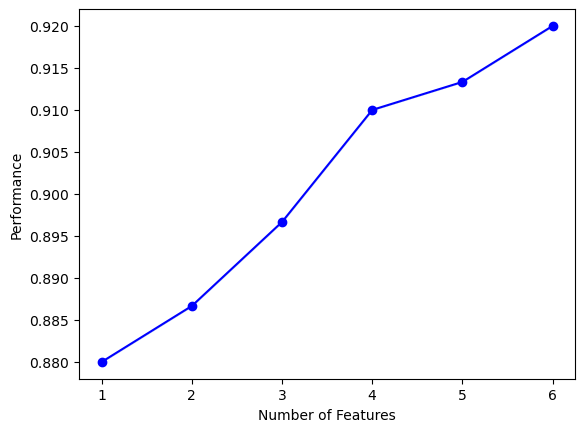

In [639]:
# Plot the model accuracy as a function of the number of features used
plot_sfs(sfs.get_metric_dict())
plt.show()

# Choosing Features and Model Accuracy

In [625]:
# Indexes selected by sequential backward selection
selected_indexes = [int(idx) for idx in sfs.subsets_[6]['feature_names']]

# Get the corresponding column names
selected_column_names = [features[idx] for idx in selected_indexes]
print(selected_column_names)

# Print the model accuracy after doing sequential forward selection
print(sfs.subsets_[7]['avg_score'])

['functional_competency_score', 'top1_skills_score', 'top2_skills_score', 'behavior_competency_score', 'top1_behavior_skill_score', 'Category']
0.9233333333333333


In [626]:
print(selected_column_names)

['functional_competency_score', 'top1_skills_score', 'top2_skills_score', 'behavior_competency_score', 'top1_behavior_skill_score', 'Category']


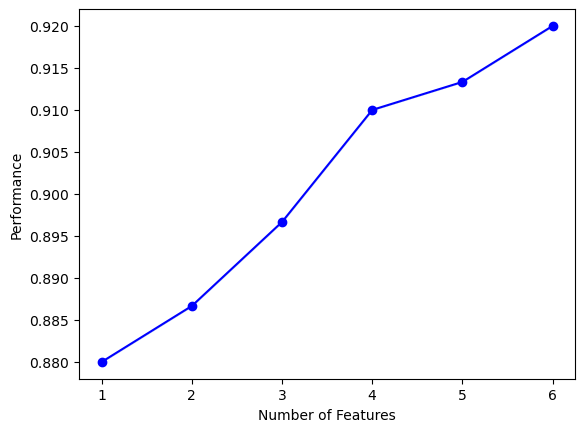

In [640]:
# Plot the model accuracy as a function of the number of features used
plot_sfs(sfs.get_metric_dict())
plt.show()

# Backward Elimination

In [647]:
#Creating a sequential forward selection method
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)



sfs = SFS(lr,
         k_features = 5,
         forward = False,
         floating = False,
         scoring = "accuracy",
         n_jobs = -1,
         cv = 0)

In [648]:
sfs.fit(X_enc_scaled,y)

SequentialFeatureSelector(cv=0,
                          estimator=LogisticRegression(C=10, max_iter=10000),
                          forward=False, k_features=(5, 5), n_jobs=-1,
                          scoring='accuracy')

In [649]:
# Fit the sequential forward selection model to X and y
sfs.fit(X_enc_scaled, y)

# Inspect the results of sequential forward selection
print(sfs.subsets_[5])

{'feature_idx': (1, 2, 3, 5, 9), 'cv_scores': array([0.92333333]), 'avg_score': 0.9233333333333333, 'feature_names': ('1', '2', '3', '5', '9')}


In [650]:
#Indexes selected by sequential backward selection
selected_indexes = [int(idx) for idx in sfs.subsets_[5]['feature_names']]

# Get the corresponding column names
selected_column_names = [features[idx] for idx in selected_indexes]
print(selected_column_names)

# Print the model accuracy after doing sequential forward selection
print(sfs.subsets_[5]['avg_score'])

['functional_competency_score', 'top1_skills_score', 'top2_skills_score', 'behavior_competency_score', 'Category']
0.9233333333333333


In [651]:
print(selected_column_names)

['functional_competency_score', 'top1_skills_score', 'top2_skills_score', 'behavior_competency_score', 'Category']


/Users/ishikadang/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:269: RuntimeWarning:

Degrees of freedom <= 0 for slice

/Users/ishikadang/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:261: RuntimeWarning:

invalid value encountered in scalar divide



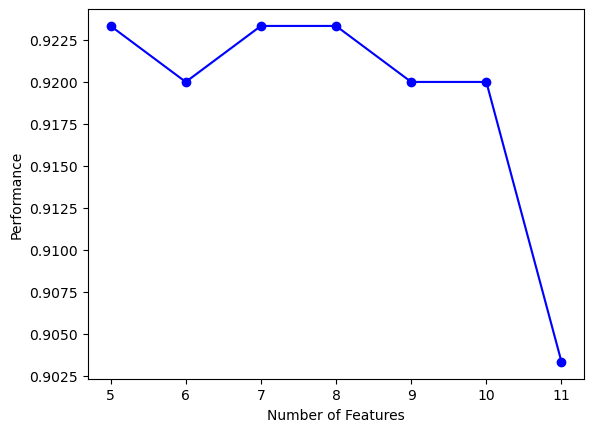

In [652]:
# Plot the model accuracy as a function of the number of features used
plot_sfs(sfs.get_metric_dict())
plt.show()